In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../files/data/'

In [3]:
solve_vs_brute_force = pd.read_csv(data_path + 'solve_vs_brute_force.csv', header=None)
solve_vs_solve_parallel = pd.read_csv(data_path + 'solve_vs_solve_parallel.csv', header=None)
threads_comp = pd.read_csv(data_path + 'comparing_different_num_of_threads.csv', header=None)
approx_exact_comp = pd.read_csv(data_path + 'approximation_vs_exact_solution.csv', header=None)

solve_vs_brute_force.columns = ['instance_size', 'solver_t', 'time_in_ns']
solve_vs_solve_parallel.columns = ['instance_size', 'solver_t', 'time_in_ns']
threads_comp.columns = ['num_of_threads', 'time_in_ns']
approx_exact_comp.columns = ['instance_size', 'approx_result', 'exact_result']

solve_vs_brute_force['solver_t'] = solve_vs_brute_force['solver_t'].str.strip()
solve_vs_solve_parallel['solver_t'] = solve_vs_solve_parallel['solver_t'].str.strip()

# Solve vs Brute Force

In [4]:
solve_vs_brute_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  280 non-null    int64 
 1   solver_t       280 non-null    object
 2   time_in_ns     280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [5]:
solve_vs_brute_force.head()

,instance_size,solver_t,time_in_ns
0,3,branch_bound,77084
1,3,brute_force,14625
2,3,branch_bound,57167
3,3,brute_force,15750
4,3,branch_bound,47833


In [6]:
solve_vs_brute_grouped = solve_vs_brute_force.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_brute_grouped = solve_vs_brute_grouped.reset_index()
bb_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'branch_bound']
bf_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'brute_force']

bb_data

,instance_size,solver_t,time_in_ns
0,3,branch_bound,54129.25
2,4,branch_bound,137331.25
4,5,branch_bound,363858.35
6,6,branch_bound,1074068.85
8,7,branch_bound,2698827.10
10,8,branch_bound,5878477.25
12,9,branch_bound,19827516.80


In [7]:
bf_data

,instance_size,solver_t,time_in_ns
1,3,brute_force,1.454580e+04
3,4,brute_force,4.912705e+04
5,5,brute_force,2.237541e+05
7,6,brute_force,1.175973e+06
9,7,brute_force,7.922856e+06
11,8,brute_force,6.275827e+07
13,9,brute_force,6.101613e+08


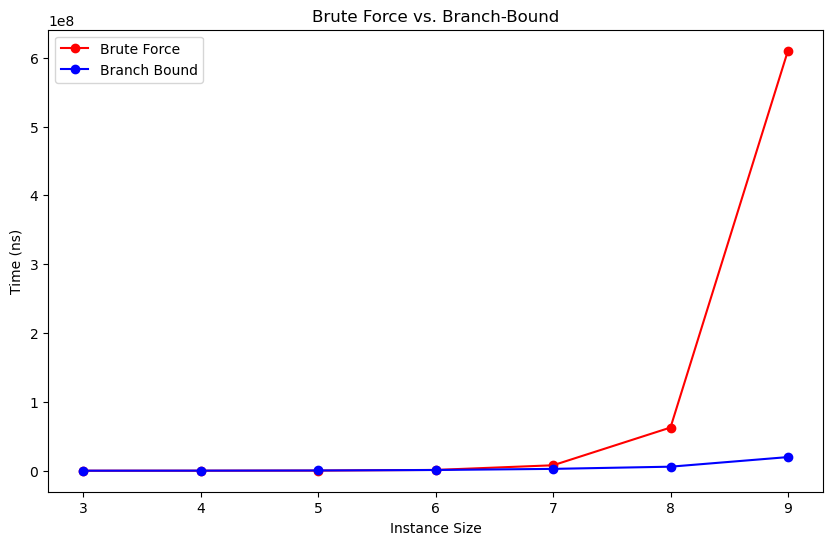

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Brute Force vs. Branch-Bound")
plt.plot(bf_data['instance_size'], bf_data['time_in_ns'], label='Brute Force', marker='o', color='r')
plt.plot(bb_data['instance_size'], bb_data['time_in_ns'], label='Branch Bound', marker='o', color='b')
plt.xlabel("Instance Size")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("brute_force_vs_branch_bound.png", format="png", dpi=300)
plt.show()

# Solve vs Solve Parallel

In [9]:
solve_vs_solve_parallel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  600 non-null    int64 
 1   solver_t       600 non-null    object
 2   time_in_ns     600 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ KB


In [10]:
solve_vs_solve_parallel.head()

,instance_size,solver_t,time_in_ns
0,3,bb,57458
1,3,bb_parallel,296042
2,3,bb,42833
3,3,bb_parallel,237083
4,3,bb,55333


In [11]:
solve_vs_solve_parallel = solve_vs_solve_parallel.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_solve_parallel = solve_vs_solve_parallel.reset_index()
bbs_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb']
bbp_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb_parallel']

bbs_data

,instance_size,solver_t,time_in_ns
0,3,bb,4.666403e+04
2,4,bb,1.148097e+05
4,5,bb,3.109944e+05
6,6,bb,9.432013e+05
8,7,bb,2.400596e+06
10,8,bb,7.407275e+06
12,9,bb,2.828825e+07
14,10,bb,6.432903e+07
16,11,bb,2.117145e+08
18,12,bb,4.262342e+08


In [12]:
bbp_data

,instance_size,solver_t,time_in_ns
1,3,bb_parallel,2.252722e+05
3,4,bb_parallel,2.617528e+05
5,5,bb_parallel,3.651596e+05
7,6,bb_parallel,5.615180e+05
9,7,bb_parallel,9.424390e+05
11,8,bb_parallel,2.203938e+06
13,9,bb_parallel,6.647050e+06
15,10,bb_parallel,1.400933e+07
17,11,bb_parallel,4.223504e+07
19,12,bb_parallel,9.428496e+07


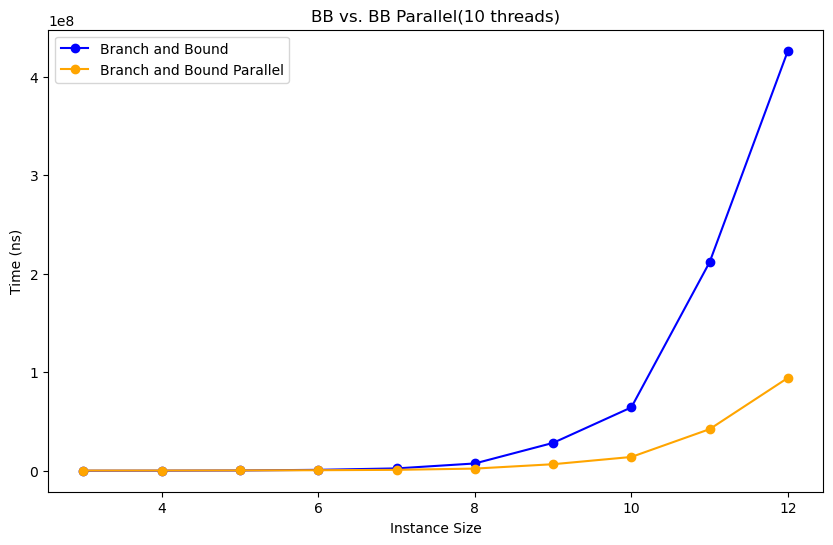

In [13]:
plt.figure(figsize=(10, 6))
plt.title("BB vs. BB Parallel(10 threads)")
plt.plot(bbs_data['instance_size'], bbs_data['time_in_ns'], label='Branch and Bound', marker='o', color='blue')
plt.plot(bbp_data['instance_size'], bbp_data['time_in_ns'], label='Branch and Bound Parallel', marker='o', color='orange')
plt.xlabel("Instance Size")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("synchronized_vs_parallel_bb.png", format="png", dpi=300)
plt.show()

# Comparing Threads

In [14]:
threads_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   num_of_threads  900 non-null    int64
 1   time_in_ns      900 non-null    int64
dtypes: int64(2)
memory usage: 14.2 KB


In [15]:
threads_comp.head()

,num_of_threads,time_in_ns
0,2,61203125
1,3,43691625
2,4,33293584
3,5,26842125
4,6,23926500


In [16]:
threads_comp = threads_comp.groupby(['num_of_threads'])['time_in_ns'].mean()
threads_comp = threads_comp.reset_index()
threads_comp.head()

,num_of_threads,time_in_ns
0,2,47961136.20
1,3,33989909.98
2,4,26852792.08
3,5,22329354.94
4,6,19166392.88


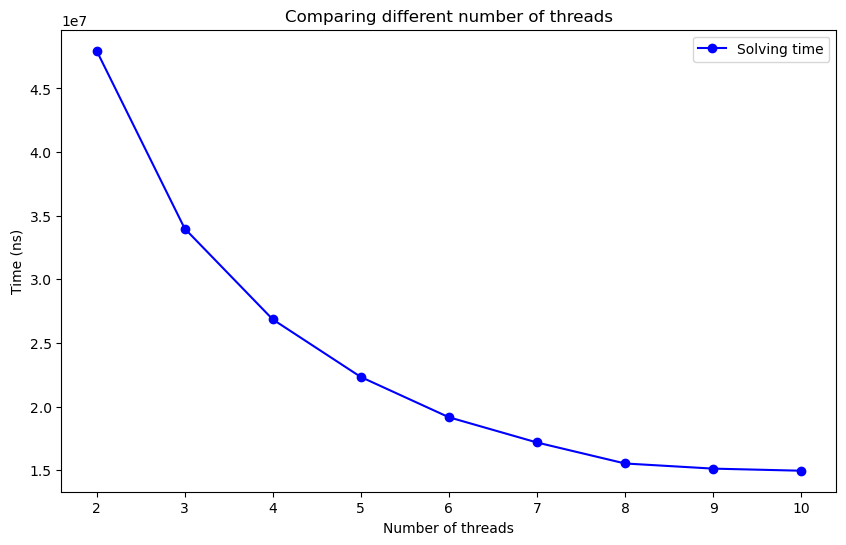

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Comparing different number of threads")
plt.plot(threads_comp['num_of_threads'], threads_comp['time_in_ns'], label='Solving time', marker='o', color='blue')
plt.xlabel("Number of threads")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("algorithm_speedup_across_thread_counts.png", format="png", dpi=300)
plt.show()

In [18]:
approx_exact_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instance_size  700 non-null    int64  
 1   approx_result  700 non-null    float64
 2   exact_result   700 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 16.5 KB


In [19]:
approx_exact_comp.head()

,instance_size,approx_result,exact_result
0,4,15.0,15.0
1,4,9.0,9.0
2,4,17.0,17.0
3,4,14.0,14.0
4,4,16.0,16.0


In [20]:
approx_exact_comp_avg = approx_exact_comp.groupby('instance_size')[['approx_result', 'exact_result']].mean()
approx = approx_exact_comp_avg[['approx_result']]
exact = approx_exact_comp_avg[['exact_result']]

approx.head(10)

,approx_result
instance_size,
4,14.90
5,17.53
6,18.80
7,20.74
8,21.86
9,24.29
10,25.62


In [21]:
exact.head(10)

,exact_result
instance_size,
4,14.90
5,16.78
6,17.49
7,18.47
8,19.10
9,20.45
10,21.27


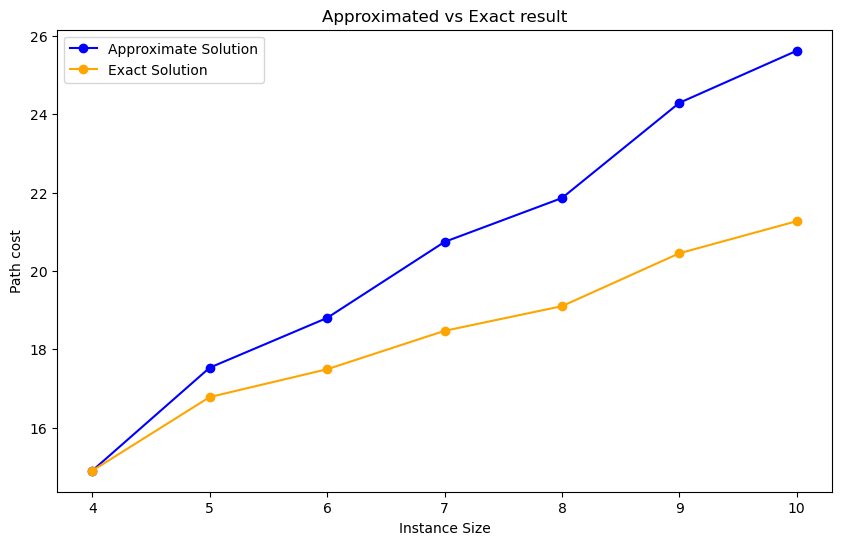

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Approximated vs Exact result")
plt.plot(approx.index, approx['approx_result'], label='Approximate Solution', marker='o', color='blue')
plt.plot(exact.index, exact['exact_result'], label='Exact Solution', marker='o', color='orange')
plt.xlabel("Instance Size")
plt.ylabel("Path cost")
plt.legend()
plt.savefig("exact_vs_approx.png", format="png", dpi=300)
plt.show()